# Predicting Heart Disease using Machine Learning

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-datas

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset

**create data dictionary**

    "1. age - age in years\n",
    2. sex - (1 = male; 0 = female)\n",
     3. cp - chest pain type\n",
    "    * 0: Typical angina: chest pain related decrease blood supply to the heart\n",
    "    * 1: Atypical angina: chest pain not related to heart\n",
    "    * 2: Non-anginal pain: typically esophageal spasms (non heart related)\n",
    "    * 3: Asymptomatic: chest pain not showing signs of disease\n",
    "4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern\n",
    "5. chol - serum cholestoral in mg/dl\n",
    "    * serum = LDL + HDL + .2 * triglycerides\n",
    "    * above 200 is cause for concern\n",
    "6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\n",
    "    * '>126' mg/dL signals diabetes\n",
    "7. restecg - resting electrocardiographic results\n",
    "    * 0: Nothing to note\n",
    "    * 1: ST-T Wave abnormality\n",
    "        * can range from mild symptoms to severe problems\n",
    "        * signals non-normal heart beat\n",
    "    * 2: Possible or definite left ventricular hypertrophy\n",
    "        * Enlarged heart's main pumping chamber\n",
    "8. thalach - maximum heart rate achieved\n",
    "9. exang - exercise induced angina (1 = yes; 0 = no)\n",
    "10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more\n",
    "11. slope - the slope of the peak exercise ST segment\n",
    "    * 0: Upsloping: better heart rate with excercise (uncommon)\n",
    "     Flatslopi betng: minimal change(typical heay heart)\n",
    "    * 2: Downslopins: signs of ualthy heart\n",
    "12. ca - number of major vessels (0-3) colored by flourosopy\n",
    "    * colorssel means the doctor can see the blood passing through\n",
    "    * the more blood movement the better (no clots)\n",
    "13. thal - thalium stress result\n",
    "    * 1,3: normal\n",
    "    * 6: fixed defect: used to be defect but ok now\n",
    "    * 7: reversable defect: no proper blood movement when excercising\n",
    "14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)"

### Preparing the tools 

We are going to use pandas, matplotlib and numpy for Data Analysis and manipulation.

In [1]:
# Import all the tools we need.

# Regular EDA and plotting librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 

# Import models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load The Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration AKA Exploratory Data Analysis (EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you are working with.

1. What Questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's Missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's Find out how many of each class there are...
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

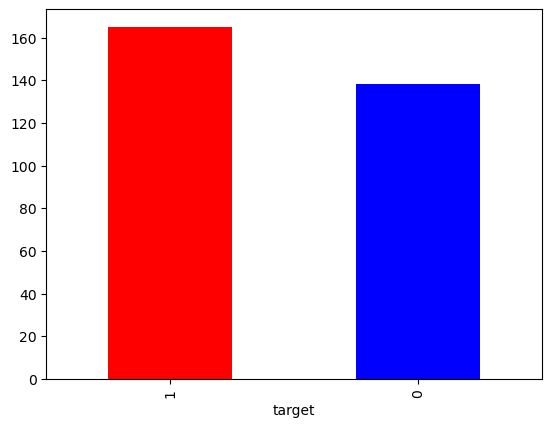

In [7]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"])
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to gender

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare target coloumn with gender coloumn
ct = pd.crosstab(df.target, df.sex)
ct

sex,0,1
target,,
0,24,114
1,72,93


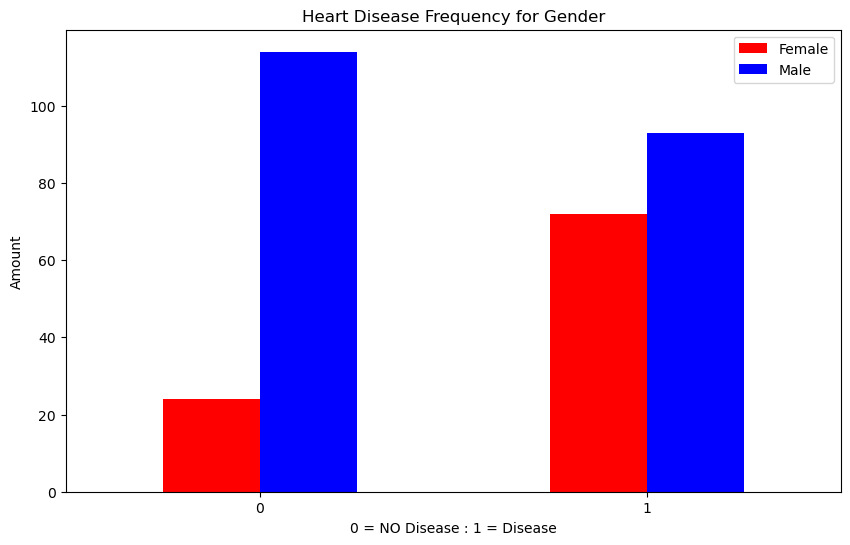

In [16]:
#Create a plot of crosstab
ct.plot(kind="bar",
        figsize=(10,6),
        color=["red","blue"])
plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = NO Disease : 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

plt.show()

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Age Vs max Heart Rate For Heart Disease

In [18]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

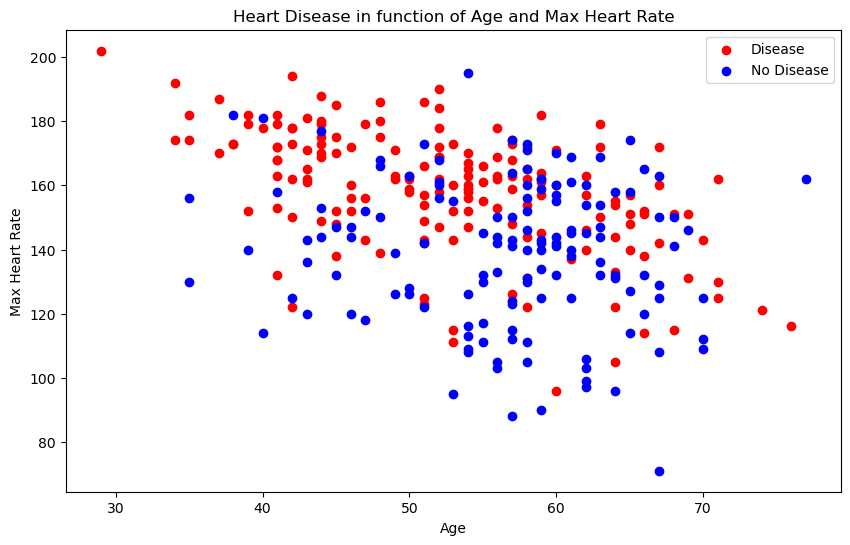

In [19]:
# Creating another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

# Catter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")

#Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);


plt.show()

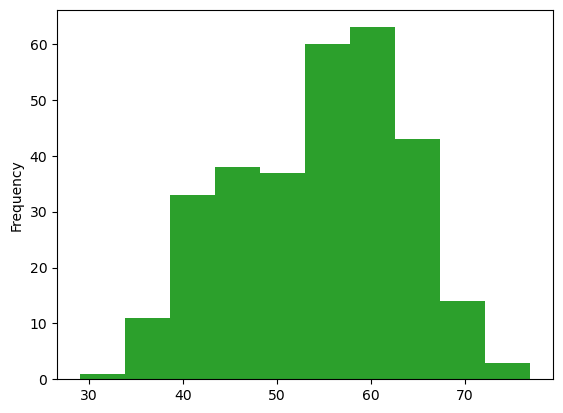

In [22]:
# Check the distribution of the age coloumn with histogram
df.age.plot.hist();
plt.show()


## Heart Disease Frequency per chest pain type
cp - chest pain type\n", * 0: Typical angina: chest pain related decrease blood supply to the heart\n
  * 1: Atypical angina: chest pain not related to heart\"
*  * 2: Non-anginal pain: typically esophageal spasms (noe heart related)n
    * 3: Asymptomatic: chest pain not showing signs of diseas\n",

In [23]:
cp = pd.crosstab(df.cp,df.target)
cp

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


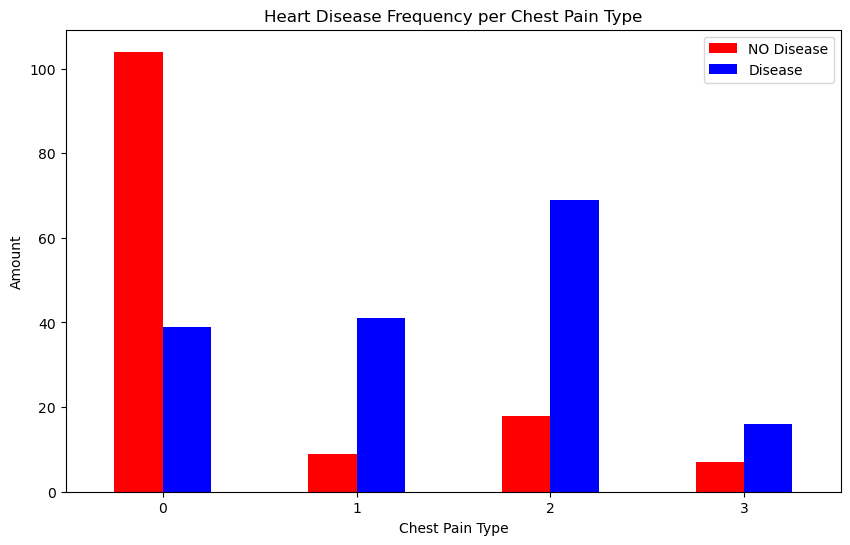

In [26]:
# Make the Cross tab more visual
cp.plot(kind="bar",
        figsize=(10,6),
        color=["red","blue"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["NO Disease","Disease"])
plt.xticks(rotation=0)
plt.show()

**Make A Correlation Matrix**

In [27]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


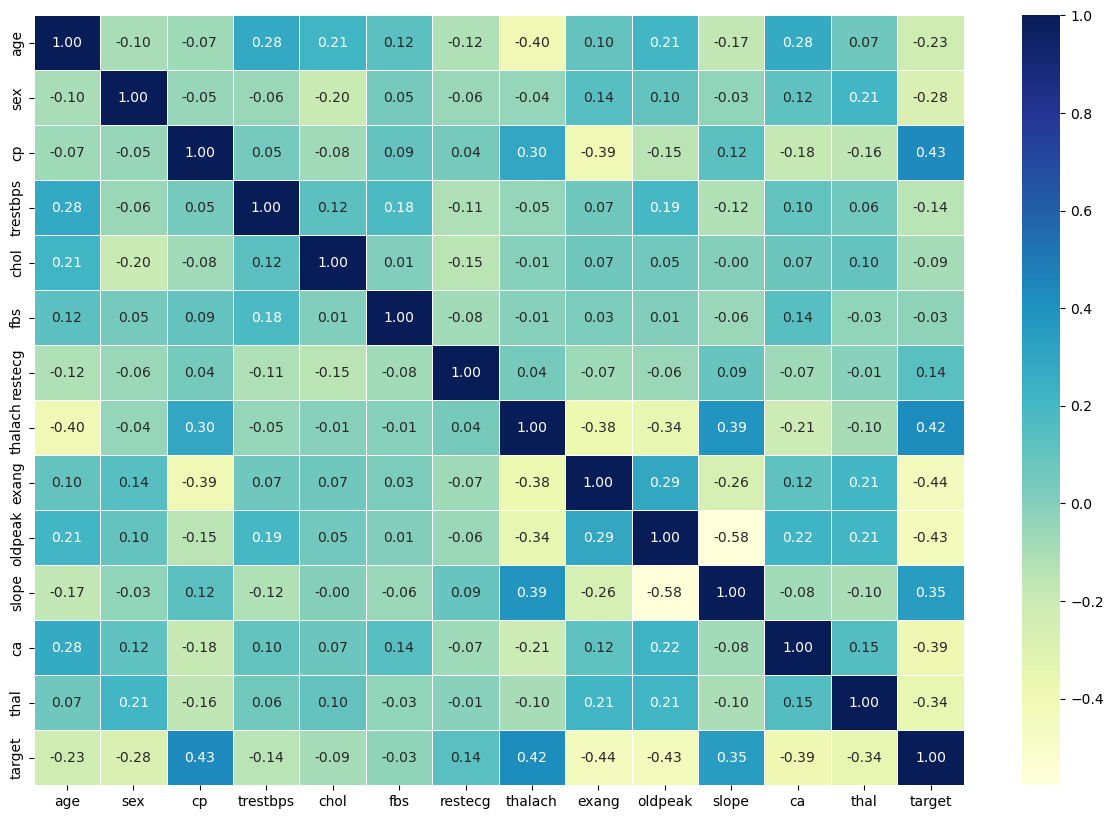

In [30]:
# Let's make our correlation a lil prettier
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

plt.show()

**For Correlaion Matrix:**
A higher value leads to a ptoential positive correlation matrix.

Simalarly, A higher negative value leads to a potential negative Correlation Matrix.

Example: As CP goes UP the target value also increases

# Modelling

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
# SPlit data into X and Y
X =  df.drop("target",axis=1)
y = df["target"]

In [34]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [36]:
# Split the data into train and test sets
#Setup random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
X_train.shape, y_train.shape

((242, 13), (242,))

*Now that we have splitted our data, we will now use it and train it (find the patterns) on the training set.*
*and to test it we will (use the patterns) on the test set.*

We are going to try 3 different Machine Learning Models
1. Logistic Regression
2. KNearestNeighbors CLassifier
3. Random Forest Classifier

In [38]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score our models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    fit and evaluate given machine learning models..
    models: a dict of different scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    #Setup a random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # Loop thorugh model scores
    for name, model in models.items():
        # Fit the model data
        model.fit(X_train,y_train)
        # Evaluate the model and append the model to it's score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [39]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\pc\Desktop\ML\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Comparison 

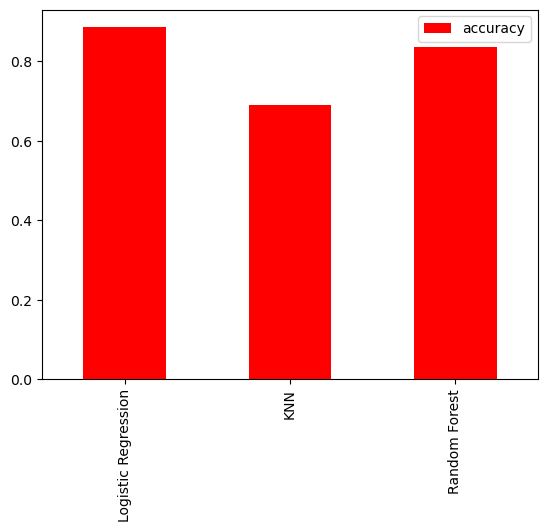

In [42]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color="red")

plt.show()

Now we have got a baseline model.. We know that our first baseline predictions are not always what we should have based our next steps of
what should we do?

Lets look at the following:
* Hyperparamete Tuning
* Feature IMportance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1-score
* Classification Report
* ROC Curve
* AUC (Area under the Curve)

## Hyperparameter Tuning (BY Hand)
let's Tune KNN

In [43]:
train_scores = []
test_scores = []

# Create a list of different values for N-Neighbors
neighbors = range(1,21)

#Setup KNN Instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm
    knn.fit(X_train,y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))

    #Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [44]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [45]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the data: 75.41%


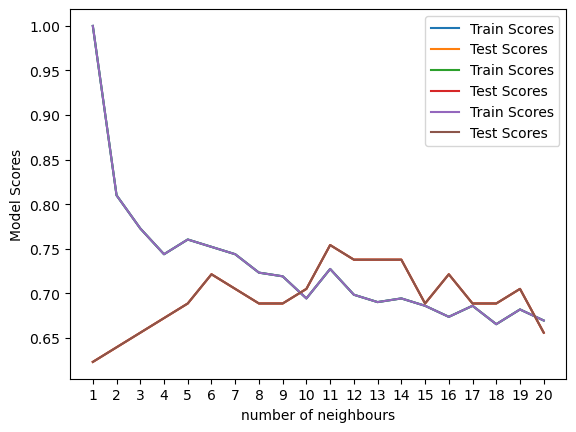

In [48]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbours")
plt.ylabel("Model Scores")
plt.legend();

print(f"Maximum KNN Score on the data: {max(test_scores)*100:.2f}%")

plt.show()

## Hyperparameter tuning with Randomized Seacrh CV

We are going to Tune our Hyperparameters of
* Logistic Regression
* Random Forest Classifier
.... Using Randomized Search CV

In [49]:
# Create a hyperparameter grid For Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"] }

#Create hyperparameter grid for randomforestclassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None,7,9,15],
           "min_samples_split": np.arange(2,26,2),
           "min_samples_leaf": np.arange(1,26,2)}

Now we have got hyperparameter grids setup for each of our models,
Let's tune them using RandomizedSearchCV()...

In [50]:
# Tune LogisticRegression
#Setup Random Seed
np.random.seed(42)

#Setup Hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit Random hyperparameter Search For LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [51]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [52]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we have tuned Logistic Regrssion. Let's do the same for random forest Classifier

In [53]:
#Setup the random seed
np.random.seed(42)

#Setup Hyperparameter search for RandomforestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=40,
                           verbose=True)

# Fit Random hyperparameter Search For RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=40,
                   param_distributions={'max_depth': [None, 7, 9, 15],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 9}

In [54]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Tune the hyperparameters Using GridSearchCV

Since Our logistic regression model provides the best scores so far, we will try and use them again using gridsearchCV()

In [55]:
## Different Hyperparameters grid for Logistic Regression model
log_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"] }

gs_log_red = GridSearchCV(LogisticRegression(),
                          param_grid=log_grid,
                          cv = 5,
                         verbose=True)
# Fit Grid hyperparameter Search For LogisticRegression
gs_log_red.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [56]:
gs_log_red.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [57]:
#Evaluate Our grid search regression model
gs_log_red.score(X_test,y_test)

0.8852459016393442

In [58]:
#Create hyperparameter grid for randomforestclassifier
rf_grid = {"n_estimators": [100,500],
           "max_depth": [None,10,20],
           "min_samples_split": [2,5,10],
           "max_features": ["sqrt","log2"]}

gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=5,
                    verbose=True)

# Fit Grid hyperparameter Search For RandomForestClassifier
gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500]},
             verbose=True)

In [60]:
gs_rf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 500}

In [61]:
gs_rf.score(X_test,y_test)

0.8688524590163934

## Evaluating Our Machine Learning Classifier, beyond accuracy
* ROC Curve and AUC Curve
* Confusion Matrix
* Classification Report
* Precision, recall and F1-score

... and it would be great if cross-validation is used if possible. 

To make comparisons and evaluate our trained model first we need to make predictions..

In [62]:
# Make predictions with tuned model
y_preds = gs_log_red.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [63]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [64]:
# Display ROC Curve and calculate AUC Curve
RocCurveDisplay.from_estimator(estimator=gs_log_red,
                               X=X_test,
                               y=y_test)

In [65]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


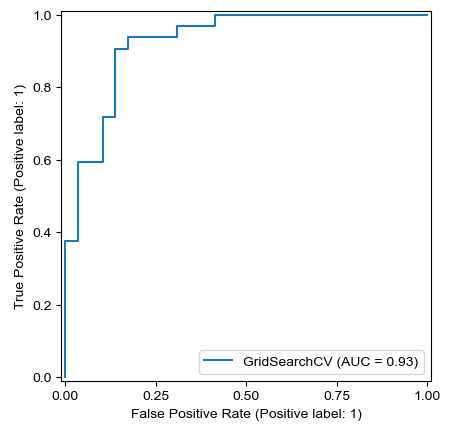

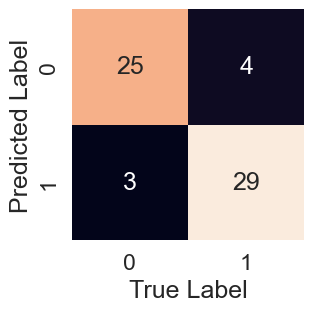

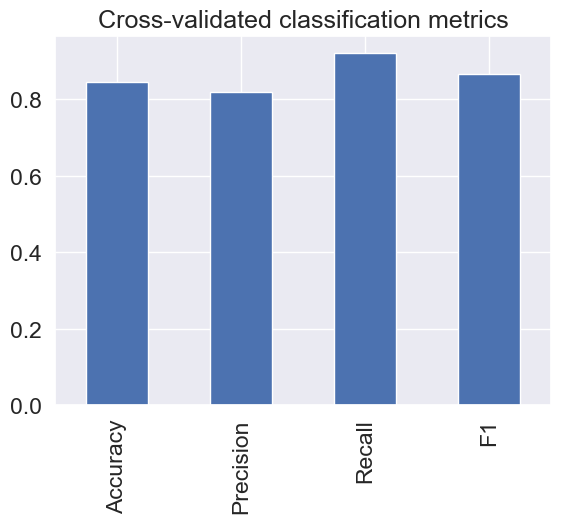

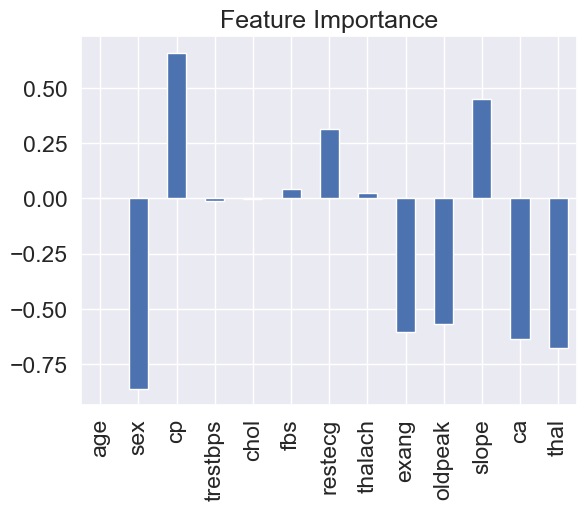

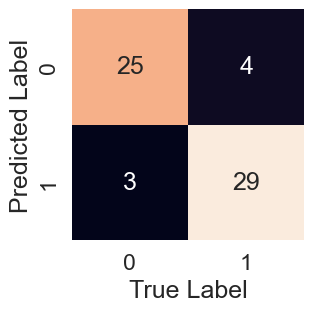

In [84]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking Confusion Matrix using Seaborn's Heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot = True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test,y_preds)

plt.show()

Now we have got ROC curve and AUC amtrix, Let's get a classification report and also cross-validated precsion, recall and f1-score

In [67]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluate metrics using Cross Validation

We are going to calculate precision, recall and f1-score using cross_val_score()

In [68]:
# Check Best Hyperparameters
gs_log_red.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [69]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [70]:
# Cross-validated Accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [71]:
# Cross-validated Precision
cv_pre = cross_val_score(clf,
                         X,
                         y,
                         scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [72]:
# Cross-validated Recall
cv_rec = cross_val_score(clf,
                         X,
                         y,
                         scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [73]:
# Cross-validated F1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [74]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_pre,
                           "Recall": cv_rec,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

# Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [75]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
gs_log_red.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [77]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [78]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [79]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003167280425913024,
 'sex': -0.8604465017405314,
 'cp': 0.6606704375815468,
 'trestbps': -0.011569931400895204,
 'chol': -0.0016637445504085657,
 'fbs': 0.04386110683275644,
 'restecg': 0.3127584216723769,
 'thalach': 0.024593614040407018,
 'exang': -0.6041307979006147,
 'oldpeak': -0.5686280785492623,
 'slope': 0.45051628777983527,
 'ca': -0.6360989513753182,
 'thal': -0.6766337783287578}

In [81]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [82]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [83]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

# Experimentation
If you haven't hit your evaluation metric yet... ask yourself...

1. Could you collect more data?
2. Could you try a better model? Like CatBoost or XGBoost?
3. Could you improve the current models? (beyond what we've done so far)
4. If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?